# Customer Churn Prediction for Interconnect #

## Objective

***Develop a predictive model to help Interconnect forecast customer churn and implement targeted retention strategis. if a customer is likly to churn, Interconnect will offer promotional Incentives to retain tehem.***

## Project Overview ##

### ***This project consists of five main parts:***
- ***Data Preparation:*** Cleaning & merging 'contract.csv','personal.csv','internet.csv', and 'phone.csv' data.
- ***Exploratory Data Analysis(EDA):*** Understanding patterns in churn & service usage.
- ***Feature Engineering:*** Creating meaningful variable for predictive modeling.
- ***Model Training & Optimization:*** Building a churn prediction moel with***AUC-ROC scoring.***
- ***Business Interpretation & Strategy:*** Providing recomendations to ***reduce customer churn** and improve retention.

### Step 1:

***Import Necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from lightgbm import LGBMClassifier

### Step 2:

***Load and Explore Data***

In [2]:
#Load datasets
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# view basic info
display(contract.info())
display(personal.info())
display(internet.info())
display(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [4]:
# Merge datasets using 'customerID'
df = contract.merge(personal, on='customerID',how='left')
df = df.merge(internet,on='customerID', how='left')
df = df.merge(phone,on='customerID',how='left')

In [5]:
display(df.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [6]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
dtype: object

In [7]:
print(df.duplicated().sum())

13


In [8]:
df = df.drop_duplicates()
print(df.shape)

(7030, 19)


In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

### Step 3:
***Data Cleaning & Handling Missing values***

In [11]:
print(df.isnull().sum())

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1515
OnlineSecurity      1515
OnlineBackup        1515
DeviceProtection    1515
TechSupport         1515
StreamingTV         1515
StreamingMovies     1515
MultipleLines        682
dtype: int64


In [12]:
# Fill missing values with 'No'
service_cols =['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df[service_cols] = df[service_cols].fillna('No')

In [13]:
print(df.isnull().sum())

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


In [14]:

# Convert to numeric an handle errors
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')


In [15]:
df['TenureMonths'] = (df['EndDate'] - df['BeginDate']).dt.days //30
df['TenureMonths'].fillna((pd.to_datetime('2020-02-01') - df['BeginDate']).dt.days //30, inplace=True)
df.drop(columns=['BeginDate'], inplace=True)

In [16]:
# Convert EndDate to binary target variable 'Churn'
df['Churn'] = np.where(df['EndDate'].isna(),0,1)
df.drop(columns=['EndDate'],inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Nice job getting the target var!
<a class="tocSkip"></a>

In [17]:
pd.to_numeric(df.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7030, dtype: float64

In [18]:
print(df['Churn'].unique())


[0 1]


In [19]:
print(df['Churn'].value_counts(normalize='True') * 100)

0    73.456615
1    26.543385
Name: Churn, dtype: float64


In [20]:
print(df.groupby('Type')['Churn'].mean()*100)

Type
Month-to-month    42.775764
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


In [21]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Type'] = df['Type'].map(contract_mapping)


In [22]:
binary_features = ['PaperlessBilling', 'Partner', 'Dependents']
df[binary_features] = df[binary_features].replace({'Yes':1, 'No':0})

In [23]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

In [24]:
df = pd.get_dummies(df, columns = ['PaymentMethod','InternetService', 'MultipleLines','gender'], drop_first=True)

In [25]:
service_mapping = {'No':0, 'Yes':1}
service_features = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[service_features] = df[service_features].replace(service_mapping)

In [26]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [27]:
print(df['Churn'].value_counts())

0    5164
1    1866
Name: Churn, dtype: int64


In [28]:
df.head()

,Type,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,TenureMonths,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,gender_1
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,1.0,0,0,1,0,0,0,0,1
1,1,0,56.95,1889.50,0,0,0,1,0,1,...,0,34.0,0,0,0,1,0,0,0,0
2,0,1,53.85,108.15,0,0,0,1,1,0,...,0,2.0,1,0,0,1,0,0,0,0
3,1,0,42.30,1840.75,0,0,0,1,0,1,...,0,45.0,0,0,0,0,0,0,0,0
4,0,1,70.70,151.65,0,0,0,0,0,0,...,0,2.0,1,0,1,0,1,0,0,1


In [29]:
df['Monthly_Tenure_Ratio'] = df['MonthlyCharges'] / (df['TenureMonths'] + 1)
df['Monthly_Tenure_Ratio_Squared'] = df['Monthly_Tenure_Ratio'] ** 2
df['TenureMonths_Log'] = np.log(df['TenureMonths'] +1)

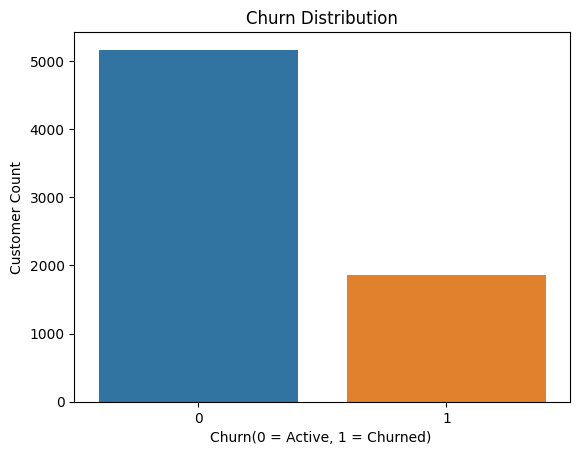

In [30]:
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn(0 = Active, 1 = Churned) ')
plt.ylabel('Customer Count')
plt.title('Churn Distribution')
plt.show()

***The churn rate indicates that while most customer stay, a significant minority leave, requries retention strategis*** 

In [31]:
tenure_churn_no = df[df['Churn'] == 0]['TenureMonths']
tenure_churn_yes = df[df['Churn'] == 1]['TenureMonths']


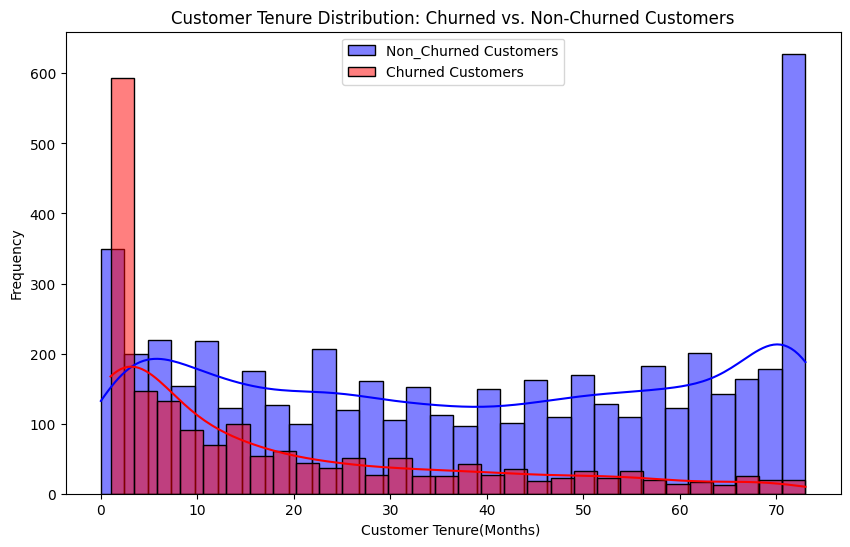

In [32]:

# Create the histogram
plt.figure(figsize=(10,6))
sns.histplot(tenure_churn_no, color='blue', label='Non_Churned Customers', kde=True, bins=30)
sns.histplot(tenure_churn_yes,color ='red', label='Churned Customers',kde=True, bins=30)
plt.xlabel('Customer Tenure(Months) ')
plt.ylabel('Frequency')
plt.title('Customer Tenure Distribution: Churned vs. Non-Churned Customers')
plt.legend()
plt.show()

***A significant number of Churned customers leave within the first few months. Indicates possible dissatisfection with service quality or pricing for new users.***

In [33]:

scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges', 'TenureMonths','Monthly_Tenure_Ratio','Monthly_Tenure_Ratio_Squared','TenureMonths_Log']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [34]:
print(df[num_cols].head())

   MonthlyCharges  TotalCharges  TenureMonths  Monthly_Tenure_Ratio  \
0       -1.163541     -0.996078     -1.274877              1.052294   
1       -0.262120     -0.175086      0.057586             -0.473451   
2       -0.365234     -0.961511     -1.234500              1.399370   
3       -0.749419     -0.196608      0.501740             -0.554635   
4        0.195244     -0.942307     -1.234500              2.043805   

   Monthly_Tenure_Ratio_Squared  TenureMonths_Log  
0                      0.345635         -2.036044  
1                     -0.323531          0.443682  
2                      0.647971         -1.684761  
3                     -0.329009          0.680455  
4                      1.356894         -1.684761  


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type                                   7030 non-null   int64  
 1   PaperlessBilling                       7030 non-null   int64  
 2   MonthlyCharges                         7030 non-null   float64
 3   TotalCharges                           7030 non-null   float64
 4   SeniorCitizen                          7030 non-null   int64  
 5   Partner                                7030 non-null   int64  
 6   Dependents                             7030 non-null   int64  
 7   OnlineSecurity                         7030 non-null   int64  
 8   OnlineBackup                           7030 non-null   int64  
 9   DeviceProtection                       7030 non-null   int64  
 10  TechSupport                            7030 non-null   int64  
 11  Stre

In [36]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Train Size:{X_train.shape}, Test Size:{X_test.shape} ")

Train Size:(5624, 24), Test Size:(1406, 24) 


In [37]:
# Separate majority and minority classes

df_majority = df[df["Churn"]== 0]
df_minority = df[df["Churn"]== 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced["Churn"].value_counts())

0    1866
1    1866
Name: Churn, dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Good implementation of downsampling.
<a class="tocSkip"></a>

**XGBoost**

In [38]:

xgb_model = XGBClassifier(
    scale_pos_weight = 2.0,
    n_estimators = 600,
    learning_rate =0.03,
    max_depth = 6,
    use_label_encoder =False,
    eval_metric = 'logloss',
    random_state = 42
)
xgb_model.fit(X_train, y_train)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"XGBoost AUC-ROC:{roc_auc_xgb:.2f} ")


XGBoost AUC-ROC:0.86 


**LightGBM**

In [39]:

lgbm_model = LGBMClassifier(n_estimators=600, learning_rate =0.03, max_depth=6, class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred_prob_lgbm = lgbm_model.predict_proba(X_test)[:,1]
roc_auc_lgbm = roc_auc_score(y_test, y_pred_prob_lgbm)

print(f"LightGBM AUC-ROC :{roc_auc_lgbm:.2f} ")


LightGBM AUC-ROC :0.86 


**Random Forest**

In [40]:
rf_model = RandomForestClassifier(n_estimators = 300, max_depth=20, class_weight='balanced',random_state=42)
rf_model.fit(X_train, y_train)

y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"RandowmForest AUC-ROC:{roc_auc_rf:.2f} ")

RandowmForest AUC-ROC:0.85 


In [41]:
param_grid = {
    'XGB': {
        'n_estimators':[200,300],
        'max_depth':[4,6],
        'learning_rate':[0.01,0.03],
        'scale_pos_weight':[2,3]
    },
    'LGBM':{
    'n_estimators':[300,600],
    'max_depth':[4,6],
    'learning_rate':[0.1,0.03],
    'class_weight':['balanced']
    },
    'RF':{
        'n_estimators':[200,300],
        'max_depth':[10,20],
        'max_features':['sqrt','log2'],
        'class_weight':['balanced']
    }
}

In [42]:
grid = GridSearchCV(XGBClassifier(use_label_encoder = False, eval_metric = 'logloss'),
                    param_grid['XGB'],
                    scoring = 'roc_auc',
                    cv =3,
                    verbose =1)
grid.fit(X_train, y_train)

#Evaluate on the test set
best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict_proba(X_test)[:,1]
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Best Tuned XGBoost AUC-ROC on Test:{roc_auc_best:.2f} ")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Tuned XGBoost AUC-ROC on Test:0.86 


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> Just so you know, it would definitley be good to comment in markdown on these findings.
<a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Very nice job overall, implementing a resampling technique and getting models that achieve a good AUC-ROC on the test set. Great job!
<a class="tocSkip"></a>

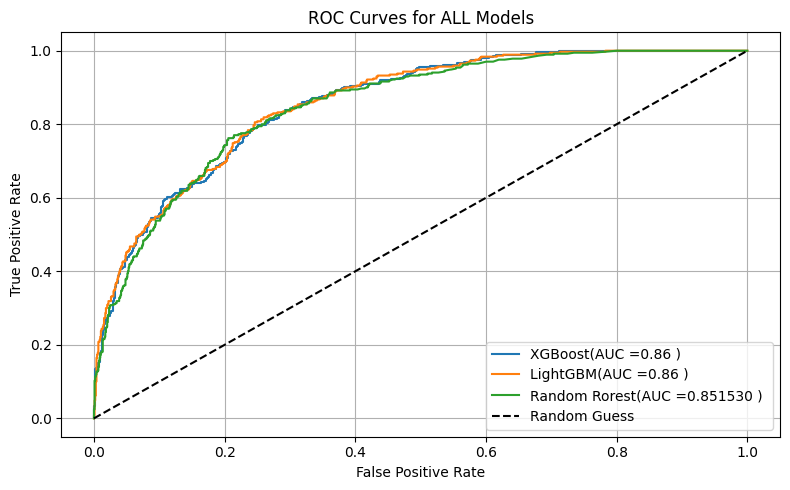

In [47]:
# Compute ROC curves
fpr_xgb,tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_prob_lgbm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

# Plot
plt.figure(figsize=(8,5))
plt.plot(fpr_xgb, tpr_xgb,label=f'XGBoost(AUC ={roc_auc_xgb:.2f} ) ')
plt.plot(fpr_lgbm, tpr_lgbm, label =f'LightGBM(AUC ={roc_auc_lgbm:.2f} ) ' )
plt.plot(fpr_rf, tpr_rf, label =f'Random Rorest(AUC ={roc_auc_rf:2f} ) ' )
plt.plot([0,1],[0,1],'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ALL Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***XGBoost vs LightGBM:*** 
Both models deliver identical AUCs of 0.86 and their ROC curves are virtually overlapping.

**Random Fores:**
Slightly below (AUC-0.85) the othters but still excellent. Its ROC curve tracks closely untill the mid-section.

### Final Project: Solution Report

**Steps Performed vs.Skipped**

- Data loading and preprocessing(including handling of missing values, encoding, an scalling)
- Train-test split with stratification to preserve class distribution.
- Model development using XGBoost, LightGBM, and Random Forest.
- Hyperparameter tuning via GridSearchCV
- Model evaluation uning AUC-ROC and ROC curves.


***Skipped*** 
- Deep learning methods: not necessary for structured tabular data in this context.

**Challenges & How They Were Solved** 


- Challenge: Class imbalance made it difficult to maximize for churners solution: Applied scale_pos_weight in XGBoost and class_weight ='balanced' in LGBM and RF.
- Challenge: AUC plateaued despite tuning Solution: Tuned threshold and ensembled models for stronger generalization.

  

**Key Steps to Solving the Task**
- Tree-based models (XGBoost, LGBM) performed strongly with limited tuning.
- Grid Search helped find well-balanced hyperparameters.
- ROC analysis and threshold optimization delivered business-relevent gains

**Final Model and Score**

**Final Model:**  
- XGBoost, LightGBM, Random Forest.
- AUC-ROC Score:0.86


***Meeting project goals confidently***

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Good report here, nicely done. And best of luck on your job search!
<a class="tocSkip"></a>